<a href="https://colab.research.google.com/github/miya498/image_delete_fence/blob/master/delete_fence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ÊüµËá™ÂãïÂâäÈô§„É¢„Éá„É´
„ÉªÁîªÂÉèÂÜÖÊ≠£Èù¢„Å´„ÅÇ„ÇãÊüµ„ÇíËá™Âãï„ÅßÊ§úÂá∫„Åó„Å¶ÂâäÈô§„Åô„Çã„É¢„Éá„É´

„Éª‰∏ª„Å´MiDas(Ê∑±Â∫¶Êé®ÂÆö„É¢„Éá„É´)„Å®LaMa(ÁîªÂÉè‰øÆÂæ©„É¢„Éá„É´)„Çí‰ΩøÁî®„Åó„Åü

„ÄêÂÆüË°å„Äë1Êûö„ÅÆÁîªÂÉè(ex.input_base.jpg)„Çí‰∏ã„ÅÆ„Ç≥„Éº„Éâ„Åã„Çâ„Ç¢„ÉÉ„Éó„É≠„Éº„Éâ„Åó„Å¶„ÄÅÈ†Ü„Å´ÂÆüË°å„Åô„Çå„Å∞Êüµ„ÅåÈô§Âéª„Åï„Çå„ÅüÁîªÂÉè„ÇíÂá∫Âäõ„Åó„Åæ„Åô

<img src="https://github.com/miya498/image_delete_fence/blob/master/image/inpaint_img.jpg" alt="alt" width="50%"/>



# Ê∑±Â∫¶Êé®ÂÆö

## MiDaSÊ∑±Â∫¶Êé®ÂÆö
### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# MiDaS

*Author: Intel ISL*

**MiDaS models for computing relative depth from a single image.**

<img src="https://pytorch.org/assets/images/midas_samples.png" alt="alt" width="50%"/>


### Model Description

[MiDaS](https://arxiv.org/abs/1907.01341) computes relative inverse depth from a single image. The repository provides multiple models that cover different use cases ranging from a small, high-speed model to a very large model that provide the highest accuracy. The models have been trained on 10 distinct datasets using
multi-objective optimization to ensure high quality on a wide range of inputs.

### Dependencies

MiDaS depends on [timm](https://github.com/rwightman/pytorch-image-models). Install with

## „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø

In [1]:
import os
import base64
from base64 import b64decode
import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import glob
from shutil import copyfile
import shutil
import copy

In [2]:
#MidasÁî®
!pip install timm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_

In [3]:
from google.colab import files
files = files.upload()
fname = list(files.keys())[0]

Saving input_base.jpg to input_base.jpg


In [4]:
# Ê∑±Â∫¶Êé®ÂÆö„É¢„Éá„É´l„ÅÆË™≠„ÅøËæº„Åø
model_type = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", model_type)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /root/.cache/torch/hub/checkpoints/dpt_large_384.pt
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.28G/1.28G [00:14<00:00, 93.9MB/s]


DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [5]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


## Ê∑±Â∫¶Êé®ÂÆö„ÅÆÂÆüË°å

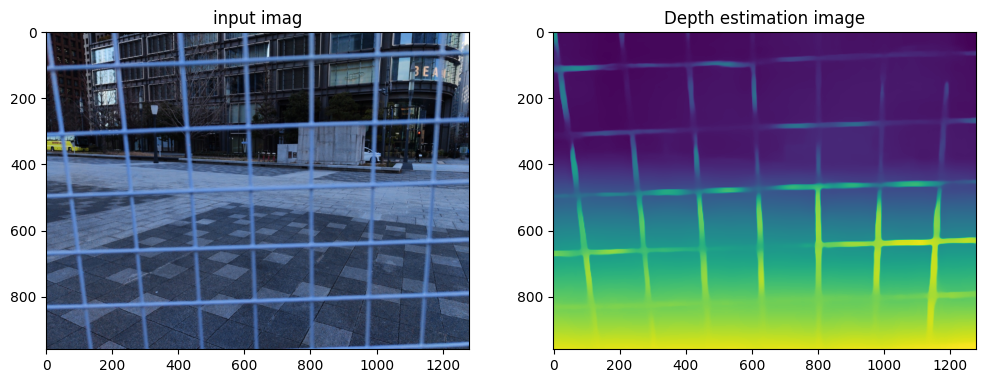

In [6]:
img = cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.GaussianBlur(img, (311, 311), 4)

input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].set_title("input imag")
axs[1].set_title("Depth estimation imag")
axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)
axs[1].imshow(output, cmap="gray", vmin=-0.001, vmax=0.001)

plt.title("Depth estimation image")
plt.imshow(output)
plt.show()

# Ê∑±Â∫¶Êé®ÂÆöÂæå„ÅÆ„Ç®„ÉÉ„Ç∏ÁîªÂÉè„ÇíÂÖÉ„Å´„Éû„Çπ„ÇØÁîªÂÉè„ÅÆ‰ΩúÊàê

In [7]:
class Mask:
    def __init__(self, edge_img):
        self.edge_img = edge_img


    def judge_line(self, line_img, ratio=0.71):
        judge_img = self.edge_img * line_img
        if np.sum(judge_img) / np.sum(line_img) > ratio:
            return True
        else:
            return False


    def get_mask(self):
        mask_img = self.get_vertical_mask() + self.get_holizontal_mask()
        mask_img[mask_img > 1] = 1
        return mask_img


    def get_vertical_mask(self):
        cols, rows = self.edge_img.shape
        mask_pre_img = np.zeros([cols, rows*3], dtype="uint8")
        for _ in range(2):
            for row_low in range(0, rows, 5):
                for shift in range(0, rows*2-row_low, 5):
                    line_pre_img = np.zeros([cols, rows*3], dtype="uint8")
                    cv2.line(line_pre_img, (row_low+shift, 0), (rows+shift, cols-1), 1, 1)
                    line_img = line_pre_img[:, rows:rows*2]
                    if self.judge_line(line_img, 0.71):
                        cv2.line(mask_pre_img, (row_low+shift, 0), (rows+shift, cols-1), 1, 10)
            self.edge_img = cv2.flip(self.edge_img, 1)
            mask_pre_img = cv2.flip(mask_pre_img, 1)
        mask_img = mask_pre_img[:, rows:rows*2]
        return mask_img


    def get_holizontal_mask(self):
        self.edge_img = cv2.rotate(self.edge_img, cv2.ROTATE_90_CLOCKWISE)
        mask_img = self.get_vertical_mask()
        self.edge_img = cv2.rotate(self.edge_img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        mask_img = cv2.rotate(mask_img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        return mask_img

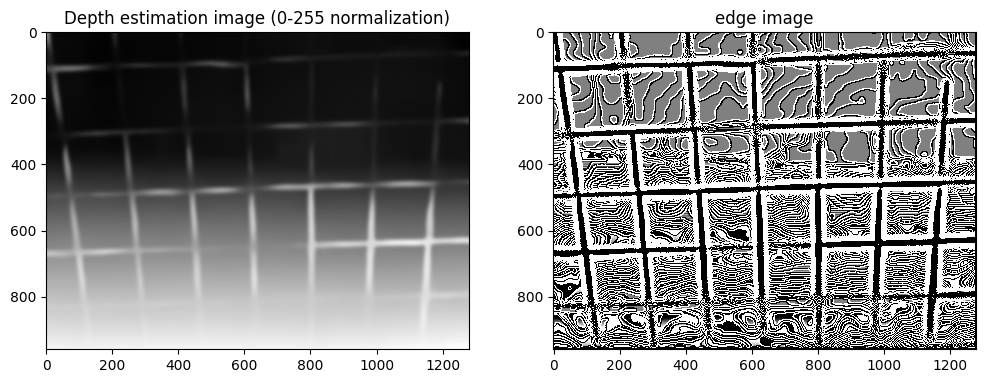

In [8]:
# Ê∑±Â∫¶Êé®ÂÆöÂæå„ÅÆÁîªÂÉè„ÅÆ„Ç®„ÉÉ„Ç∏ÁîªÂÉè
gray = cv2.normalize(output, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)  # 0-255„Å´Ë¶èÊ†ºÂåñ
blur_sigma = 5
gray = cv2.GaussianBlur(gray, (311, 311), blur_sigma)  # „Ç¨„Ç¶„Çπ„ÅßÂπ≥ÊªëÂåñÔºà„ÇÇ„Å£„Å®Â∞è„Åï„Åè„Å¶„ÇÇËâØ„ÅÑÂπ≥Êªë„Åã„ÅÆ„Éû„Çπ„ÇØ„Çµ„Ç§„Ç∫„ÅØ(311, 311Ôºâ„Å´„Åó„Å¶„ÅÑ„Çã„ÅåÁâπ„Å´ÊÑèÂë≥„ÅØ„Å™„ÅÑ„ÄÇœÉ„ÅÆÂ§ß„Åç„Åï„ÅØ„Å©„Åì„ÅåÈÅ©Âàá„Åã„ÄÇ

kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
edge = signal.convolve(gray, kernel, mode="same")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].set_title("Depth estimation image (0-255 normalization)")
axs[1].set_title("edge image")
axs[0].imshow(gray, cmap="gray", vmin=0, vmax=255)
axs[1].imshow(edge, cmap="gray", vmin=-0.001, vmax=0.001)
plt.show()

‰øùÂ≠ò„Åó„Åü„Ç®„ÉÉ„Ç∏ÁîªÂÉè


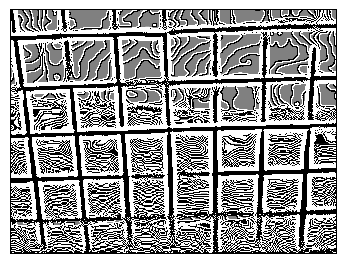

In [9]:
# „Ç®„ÉÉ„Ç∏ÁîªÂÉè„Çí‰ΩéÁîªË≥™„Åß‰øùÂ≠òÔºàË®àÁÆóÈ´òÈÄüÂåñ„ÅÆ„Åü„ÇÅÔºâ

# 302„ÅßÂâ≤„Çã„Å®‰∏ÅÂ∫¶Á∏¶Ê®™ÂçäÂàÜ„ÅÆÁîªË≥™„Å´„Å™„Çã
fig_row = edge.shape[1] / 302
fig_col = edge.shape[0] / 302

fig, ax = plt.subplots(1, 1, dpi=100, figsize=(fig_row, fig_col))

ax.imshow(edge, cmap="gray", vmin=-0.001, vmax=0.001)
ax.axis("off")
plt.savefig("edge.jpg", bbox_inches='tight', pad_inches=0)
edge_img = cv2.imread("tes.jpg", cv2.IMREAD_GRAYSCALE)
print("‰øùÂ≠ò„Åó„Åü„Ç®„ÉÉ„Ç∏ÁîªÂÉè")
plt.show()

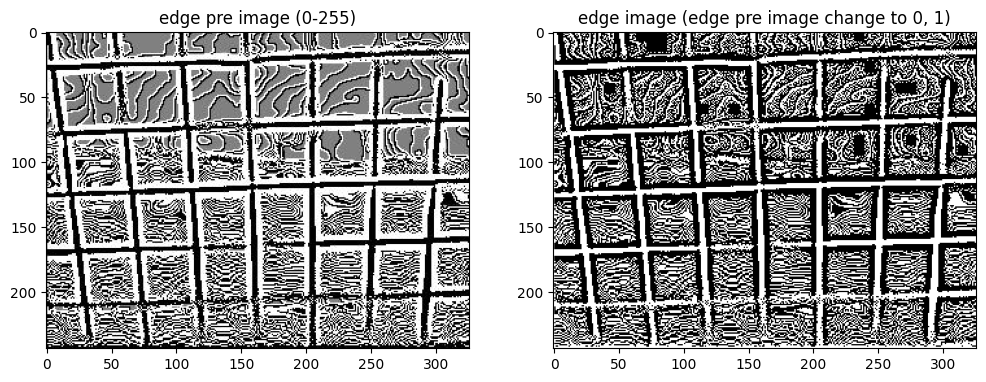

In [10]:
# „Ç®„ÉÉ„Ç∏ÁîªÂÉè„ÅÆË™≠„ÅøËæº„Åø
fname_edge = "edge.jpg"
edge_pre_img = cv2.imread(fname_edge, cv2.IMREAD_GRAYSCALE)
cols, rows = edge_pre_img.shape

edge_img = np.zeros_like(edge_pre_img, dtype="uint8")
edge_img[edge_pre_img < 127] = 1  # ÁîªÂÉè„ÅÆ2ÂÄ§Âåñ

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].set_title("edge pre image (0-255)")
axs[1].set_title("edge image (edge pre image change to 0, 1)")
axs[0].imshow(edge_pre_img, cmap="gray", vmin=0, vmax=255)
axs[1].imshow(edge_img, cmap="gray", vmin=0, vmax=1)

plt.show()

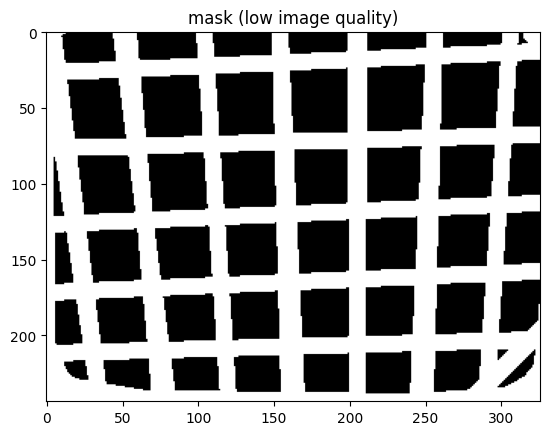

In [11]:
# „Éû„Çπ„ÇØ„ÅÆ‰ΩúÊàêÔºà‰ΩéÁîªË≥™Ôºâ
mask = Mask(edge_img)
mask_img = mask.get_mask()

plt.title("mask (low image quality)")
plt.imshow(mask_img, cmap="gray", vmin=0, vmax=1)
plt.show()

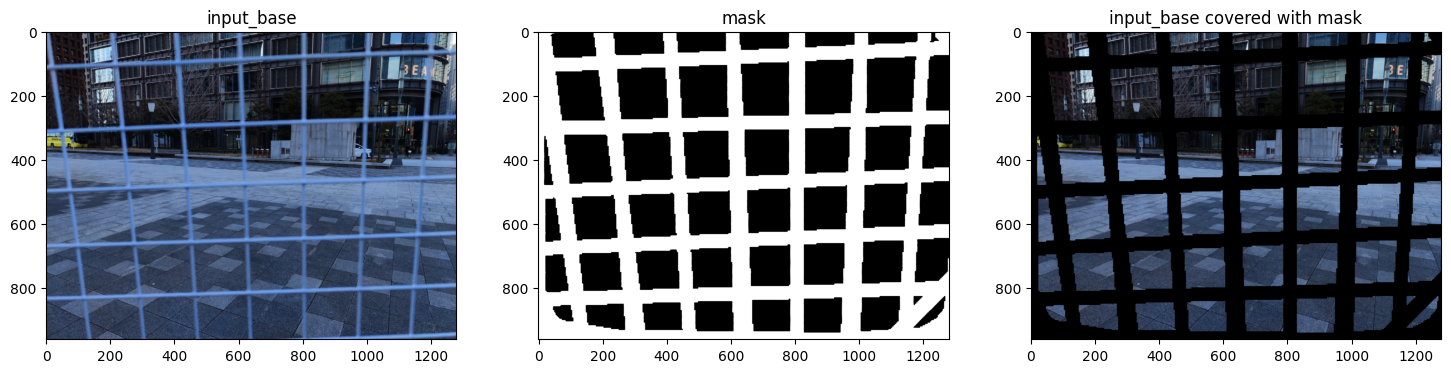

In [12]:
# input_baseÁîªÂÉè
img = cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# maskÁîªÂÉè„Çíinput_baseÁîªÂÉè„Å´Âêà„Çè„Åõ„Å¶Êã°Â§ß
mask_img = cv2.resize(mask_img, (img.shape[1], img.shape[0]))
mask_img[mask_img == 1] = 255  # ÁôΩ(255)„Å´ÁΩÆÊèõ

# input_base„Å´maskÁîªÂÉè„ÇíË¢´„Åõ„ÇãÔºàÊüµ„ÅÆÊé®ÂÆö„Åô„Çã„Å®„Åç„Å´„Åì„ÅÆÁîªÂÉè„ÅØ‰∏çË¶ÅÔºâ
img_cover_mask = copy.deepcopy(img)
img_cover_mask[mask_img == 255] = [0, 0, 0]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].set_title("input_base")
axs[1].set_title("mask")
axs[2].set_title("input_base covered with mask")
axs[0].imshow(img)
axs[1].imshow(mask_img, cmap="gray", vmin=0, vmax=255)
axs[2].imshow(img_cover_mask)

# „Éû„Çπ„ÇØÁîªÂÉè„ÅÆ‰øùÂ≠ò
cv2.imwrite(fname.replace(".jpg", "_mask_img.png"), mask_img)

plt.show()

# LaMa-inpainting„Å´„Çà„Çã„Éû„Çπ„ÇØÈÉ®ÂàÜ„ÅÆÁîªÂÉè‰øÆÂæ©

# ü¶ô LaMa: Resolution-robust Large Mask Inpainting with Fourier Convolutions

by Roman Suvorov, Elizaveta Logacheva, Anton Mashikhin,
Anastasia Remizova, Arsenii Ashukha, Aleksei Silvestrov, Naejin Kong, Harshith Goka, Kiwoong Park, Victor Lempitsky.

<p align="center" "font-size:30px;">
  üî•üî•üî•
  <br>
  <b>
LaMa generalizes surprisingly well to much higher resolutions (~2k‚ùóÔ∏è) than it saw during training (256x256), and achieves the excellent performance even in challenging scenarios, e.g. completion of periodic structures.</b>
</p>

[[Project page](https://advimman.github.io/lama-project/)] [[arXiv](https://arxiv.org/abs/2109.07161)] [[Supplementary](https://ashukha.com/projects/lama_21/lama_supmat_2021.pdf)] [[BibTeX](https://senya-ashukha.github.io/projects/lama_21/paper.txt)] [[Casual GAN Papers Summary](https://www.casualganpapers.com/large-masks-fourier-convolutions-inpainting/LaMa-explained.html)]

<p align="center">
  <a href="https://colab.research.google.com/github/advimman/lama/blob/master//colab/LaMa_inpainting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
  </a>
      <br>
   Try out in Google Colab
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/senya-ashukha/senya-ashukha.github.io/master/projects/lama_21/ezgif-4-0db51df695a8.gif" />
</p>



In [16]:
from PIL import Image

In [18]:
def pil2cv(image):
    ''' PILÂûã -> OpenCVÂûã '''
    new_image = np.array(image, dtype=np.uint8)
    if new_image.ndim == 2:  # „É¢„Éé„ÇØ„É≠
        pass
    elif new_image.shape[2] == 3:  # „Ç´„É©„Éº
        new_image = new_image[:, :, ::-1]
    elif new_image.shape[2] == 4:  # ÈÄèÈÅé
        new_image = new_image[:, :, [2, 1, 0, 3]]
    return new_image


„Éªcv2.imread()„Å´ÂºïÊï∞„Å®„Åó„Å¶„Åù„Çå„Åû„Çå„ÅÆ„Éë„Çπ„ÇíÊåáÂÆö„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

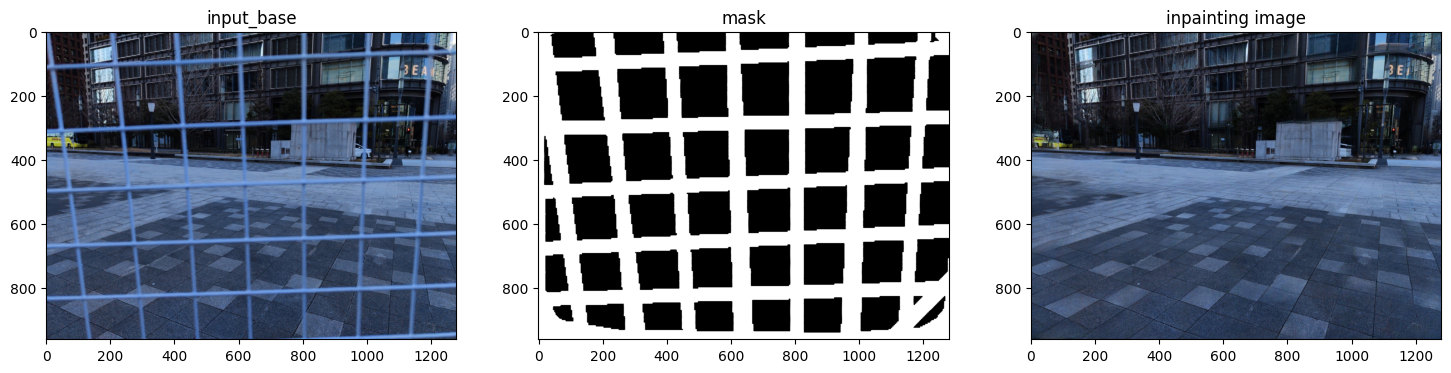

In [24]:
!pip install simple-lama-inpainting
from simple_lama_inpainting import SimpleLama

simple_lama= SimpleLama()
# input_baseÁîªÂÉè(imread)
#img = cv2.imread(fname)
img = cv2.imread("/content/input_base.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# maskÁîªÂÉè
#mask_img = cv2.imread(fname.replace(".jpg", "_mask_img.png"))
mask_img = cv2.imread("/content/input_base_mask_img.png")

# LaMa„ÅÆÁîªÂÉè‰øÆÂæ©„ÅÆÁµêÊûú
image = Image.open("/content/input_base.jpg")
mask = Image.open("/content/input_base_mask_img.png").convert("L")
inpainting_img = simple_lama(img,mask)
inpainting_img = pil2cv(inpainting_img)
inpainting_img = cv2.cvtColor(inpainting_img, cv2.COLOR_BGR2RGB)
cv2.imwrite("inpaint_img.jpg",inpainting_img)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].set_title("input_base")
axs[1].set_title("mask")
axs[2].set_title("inpainting image")
axs[0].imshow(img)
axs[1].imshow(mask_img, cmap="gray", vmin=0, vmax=255)
axs[2].imshow(inpainting_img)

plt.show()